In [1]:
# 切换工作目录，主要适用于google colab中的开发
import os

if "第一题.ipynb" not in os.listdir():
  try:
    os.chdir("drive/MyDrive")
    os.chdir("NN_Homework")
    os.chdir("HW4")
  except:
    print("无法找到正确工作目录！")
    
assert "第一题.ipynb" in os.listdir()

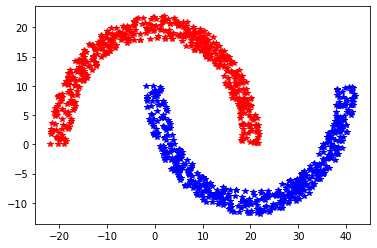

(1000, 2) (1000, 1) <class 'numpy.ndarray'>


In [2]:
# 生成双月数据集
import numpy as np
import matplotlib.pyplot as plt

def double_moon(N=100, d= -10, r=20, w=4):
    N1 = 10*N
    w2 = w/2
    done = True
    data = np.empty(0)
    while done:
        #generate Rectangular data
        tmp_x = 2*(r+w2)*(np.random.random([N1, 1])-0.5)
        tmp_y = (r+w2)*np.random.random([N1, 1])
        tmp = np.concatenate((tmp_x, tmp_y), axis=1)
        tmp_ds = np.sqrt(tmp_x*tmp_x + tmp_y*tmp_y)
        #generate double moon data ---upper
        idx = np.logical_and(tmp_ds > (r-w2), tmp_ds < (r+w2))
        idx = (idx.nonzero())[0]
        if data.shape[0] == 0:
            data = tmp.take(idx, axis=0)
        else:
            data = np.concatenate((data, tmp.take(idx, axis=0)), axis=0)
        if data.shape[0] >= N:
            done = False
    db_moon = data[0:N, :]
    #generate double moon data ----down
    data_t = np.empty([N, 2])
    data_t[:, 0] = data[0:N, 0] + r
    data_t[:, 1] = -data[0:N, 1] - d
    db_moon = np.concatenate((db_moon, data_t), axis=0)
    return db_moon


# 生成训练集，1代表红色，0代表蓝色
N = 500
data = double_moon(N)
label = np.concatenate((np.ones((N,1)),np.zeros((N,1))),axis=0)

train = np.concatenate((data,label),axis=1)
np.random.shuffle(train) # 对train进行随机重排，以消除数据集偏差

red = train[train[:,2]==1,:]
blue = train[train[:,2]==0,:]
plt.plot(red[:,0], red[:,1], 'r*', blue[:,0], blue[:,1], 'b*')
plt.show()

train_x = train[:,:2]
train_y = train[:,2].reshape((2*N,1))
print(train_x.shape,train_y.shape,type(train_x))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


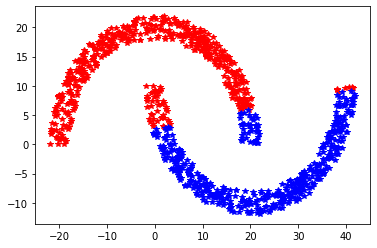

In [3]:
# 用单层感知器进行分类
from sklearn.linear_model import Perceptron

clf = Perceptron(tol=1e-3, random_state=0)

clf.fit(train_x,train_y)
clf.score(train_x,train_y)

pred = np.concatenate((train_x,clf.predict(train_x).reshape(-1,1)),axis=1)
red = pred[pred[:,2]==1,:]
blue = pred[pred[:,2]==0,:]
plt.plot(red[:,0], red[:,1], 'r*', blue[:,0], blue[:,1], 'b*')
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


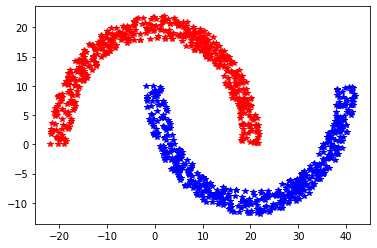

In [4]:
# 用BP神经网络进行分类
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver = 'sgd',
          activation = 'relu',
          max_iter = 10000,
          hidden_layer_sizes = (10,10,10),
          random_state = 2020)

clf.fit(train_x,train_y)
clf.score(train_x,train_y)

pred = np.concatenate((train_x,clf.predict(train_x).reshape(-1,1)),axis=1)
red = pred[pred[:,2]==1,:]
blue = pred[pred[:,2]==0,:]
plt.plot(red[:,0], red[:,1], 'r*', blue[:,0], blue[:,1], 'b*')
plt.show()